In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
survey_data = pd.read_csv('survey_results_public.csv')
survey_data.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
survey_data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
columns_to_drop = ["US_State", "UK_Country", "Age1stCode", "LearnCode", "YearsCode", "Gender", "Trans", "Sexuality", 
                  "Ethnicity", "Accessibility", "MentalHealth", 'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
                    'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith','DatabaseHaveWorkedWith', 
                    'DatabaseWantToWorkWith','PlatformHaveWorkedWith', 'PlatformWantToWorkWith','WebframeHaveWorkedWith', 
                    'WebframeWantToWorkWith','MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith','ToolsTechHaveWorkedWith', 
                    'ToolsTechWantToWorkWith','NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
                    "SurveyLength", "SurveyEase", "ConvertedCompYearly"]
survey_data = survey_data.drop(columns = columns_to_drop)
survey_data = survey_data[survey_data['SOPartFreq'].notna()]

In [5]:
survey_data.head(5)

,ResponseId,MainBranch,Employment,Country,EdLevel,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",No,25-34 years old


In [6]:
survey_data.MainBranch.value_counts()

I am a developer by profession                                                   48711
I am a student who is learning to code                                            8774
I am not primarily a developer, but I write code sometimes as part of my work     5189
I code primarily as a hobby                                                       3649
I used to be a developer by profession, but no longer am                           964
None of these                                                                      266
Name: MainBranch, dtype: int64

In [7]:
survey_data.SOPartFreq.value_counts()

Less than once per month or monthly                   30778
I have never participated in Q&A on Stack Overflow    14243
A few times per month or weekly                       12978
A few times per week                                   5687
Daily or almost daily                                  2613
Multiple times per day                                 1254
Name: SOPartFreq, dtype: int64

In [8]:
# Count the occurrences of each combination
combination_counts = survey_data.groupby(['MainBranch', 'SOPartFreq']).size().reset_index(name='Count')

# Display the result
combination_counts = survey_data.groupby(['MainBranch', 'SOPartFreq']).size().reset_index(name='Count')

# Sort the values in ascending order
combination_counts = combination_counts.sort_values(by=['MainBranch', 'SOPartFreq'], ascending= True)

# Calculate the ratio for each category
combination_counts['Ratio'] = combination_counts['Count'] / combination_counts['Count'].sum()

combination_counts

,MainBranch,SOPartFreq,Count,Ratio
0,I am a developer by profession,A few times per month or weekly,9673,0.143191
1,I am a developer by profession,A few times per week,4238,0.062736
2,I am a developer by profession,Daily or almost daily,2042,0.030228
3,I am a developer by profession,I have never participated in Q&A on Stack Over...,8692,0.128669
4,I am a developer by profession,Less than once per month or monthly,23095,0.341880
5,I am a developer by profession,Multiple times per day,971,0.014374
6,I am a student who is learning to code,A few times per month or weekly,1388,0.020547
7,I am a student who is learning to code,A few times per week,646,0.009563
8,I am a student who is learning to code,Daily or almost daily,224,0.003316
9,I am a student who is learning to code,I have never participated in Q&A on Stack Over...,3214,0.047577


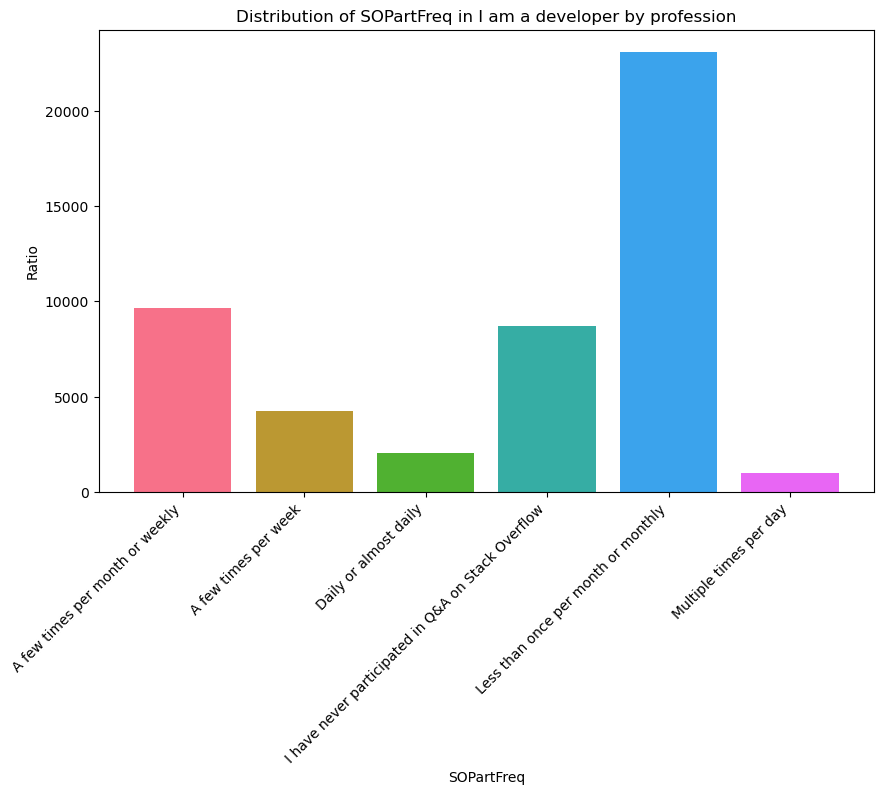

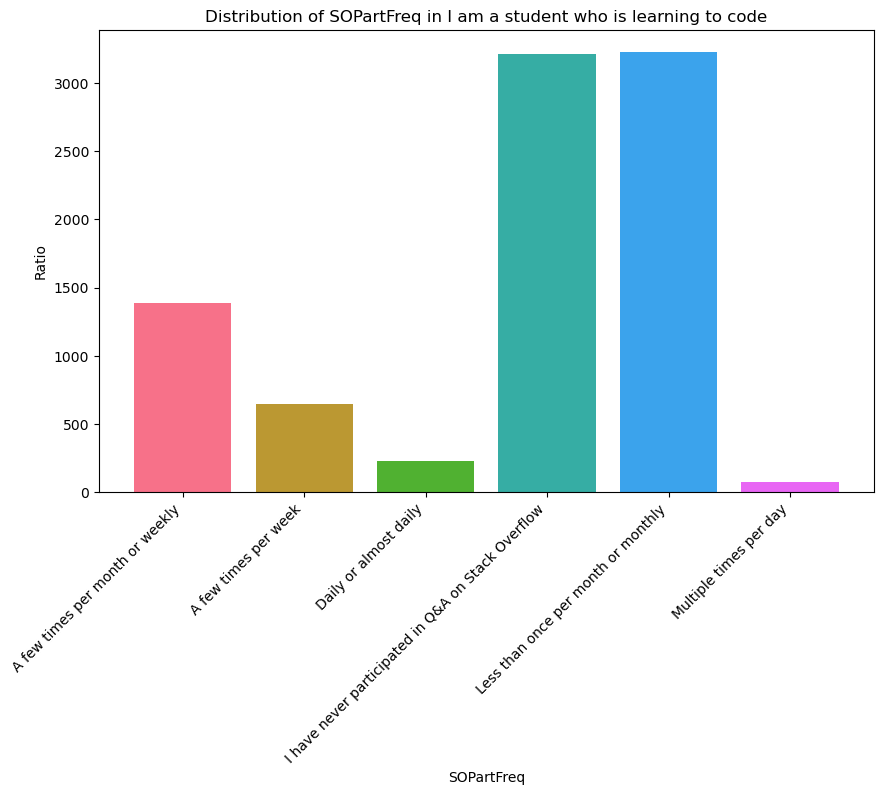

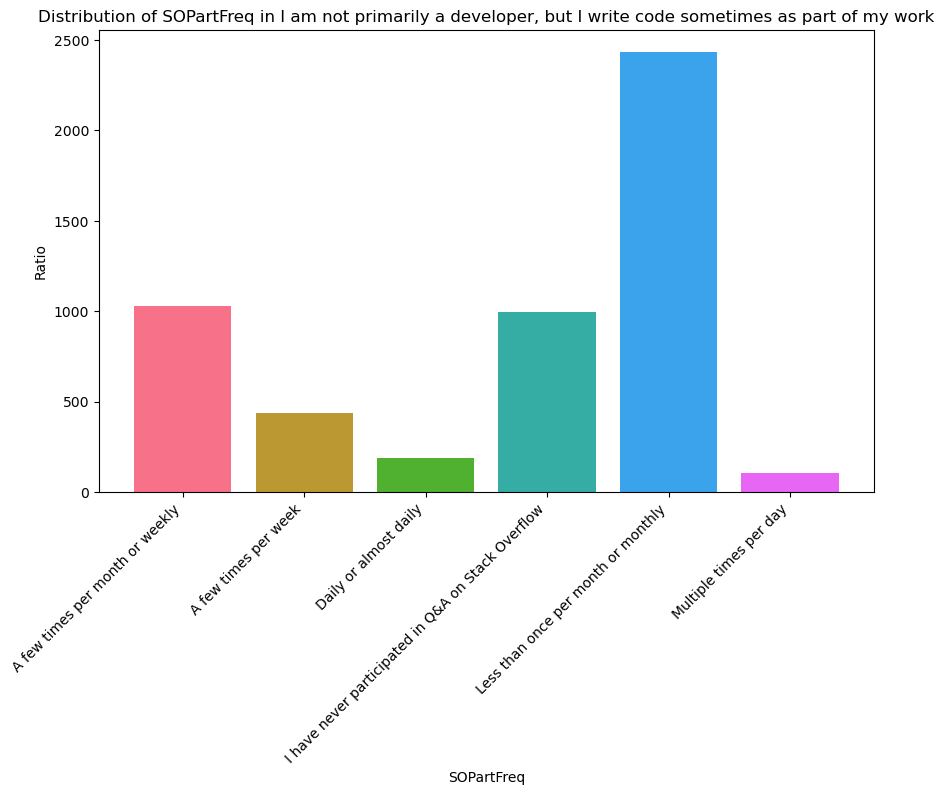

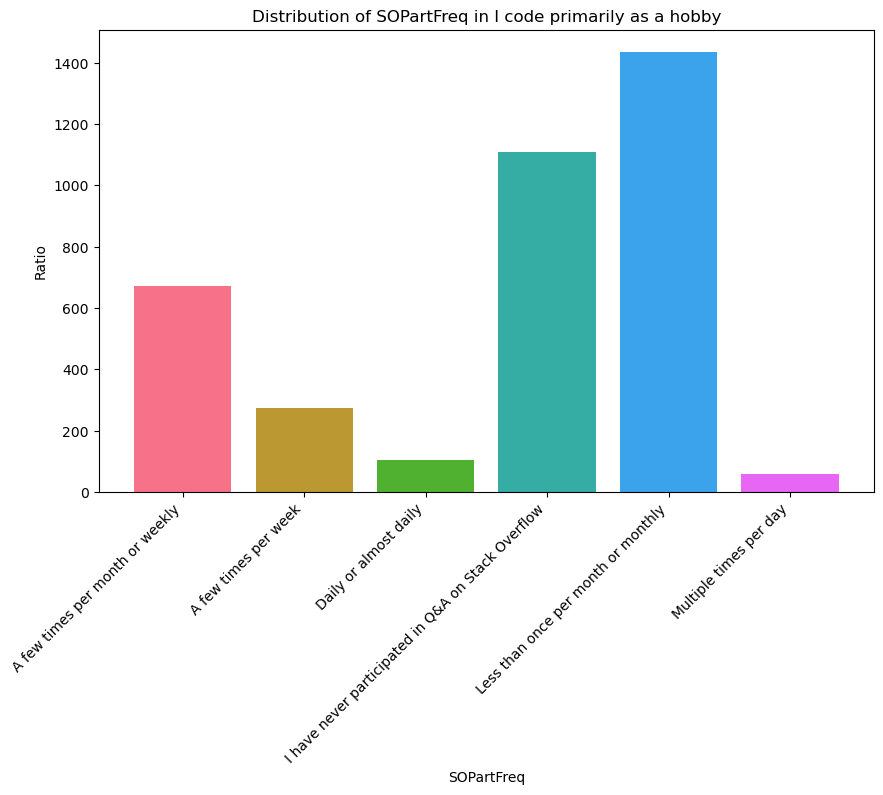

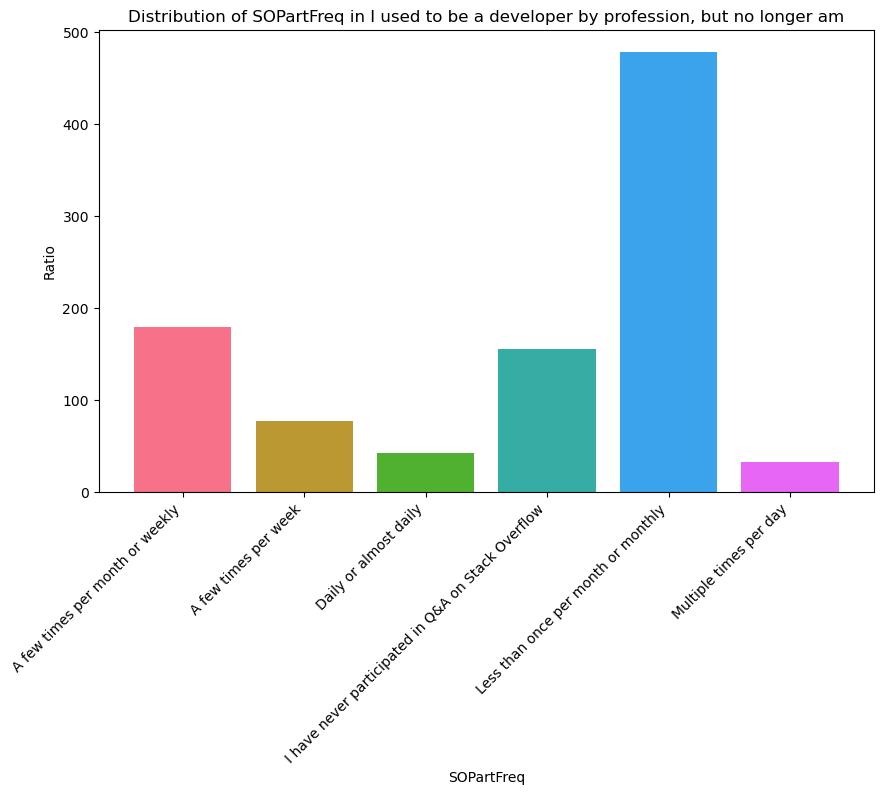

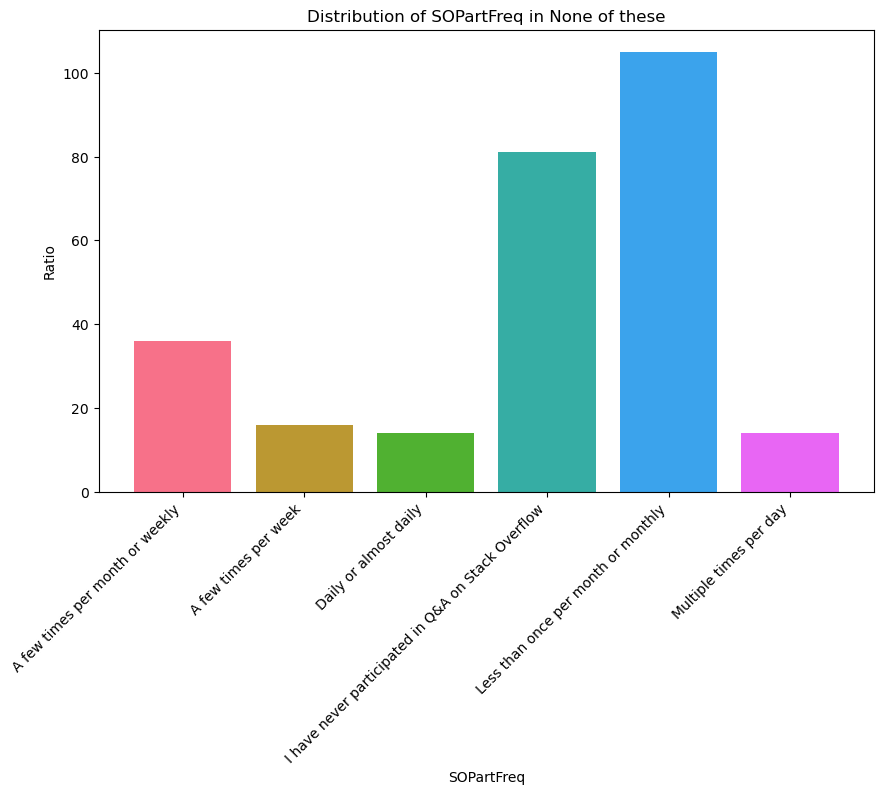

In [9]:
# Visualize the results with different colors for each bar
categories = combination_counts['MainBranch'].unique()
colors = sns.color_palette("husl", n_colors=len(combination_counts['SOPartFreq'].unique()))

for category in categories:
    category_data = combination_counts[combination_counts['MainBranch'] == category]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(category_data['SOPartFreq'], category_data['Count'], color=colors)
    plt.title(f'Distribution of SOPartFreq in {category}')
    plt.xlabel('SOPartFreq')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    plt.show()

In [10]:
most_popular_combinations = combination_counts.sort_values(by='Ratio', ascending=False).head(10)
most_popular_combinations

,MainBranch,SOPartFreq,Count,Ratio
4,I am a developer by profession,Less than once per month or monthly,23095,0.341880
0,I am a developer by profession,A few times per month or weekly,9673,0.143191
3,I am a developer by profession,I have never participated in Q&A on Stack Over...,8692,0.128669
1,I am a developer by profession,A few times per week,4238,0.062736
10,I am a student who is learning to code,Less than once per month or monthly,3230,0.047814
9,I am a student who is learning to code,I have never participated in Q&A on Stack Over...,3214,0.047577
16,"I am not primarily a developer, but I write co...",Less than once per month or monthly,2435,0.036046
2,I am a developer by profession,Daily or almost daily,2042,0.030228
22,I code primarily as a hobby,Less than once per month or monthly,1435,0.021243
6,I am a student who is learning to code,A few times per month or weekly,1388,0.020547


### DEFINITION OF PROGRAMMER BASED ON THE STACK OVERFLOW DATA 

1. **Expert** 
 - They are profesional developers. Answers the questions and participare in discussion. They are knowledgable and experienced. 
 - Low activity - they participate in Stack Overflow discussion monthly at least. 
 
2. **Early Innovator** 
 - They are proffesional developers. Usually ask the questions, trying to find out new solutions, 
   exploring new methods and techniques.  
 - Medium / low activity - they participate in Stack Overflow discussion a few times per month or weekly. 	
 
3. **Follower / Late Adapter** 
 - Those are the learners, beginning developers or students. They react on already answered questions, 
   inlcuding ups, downs & comments the questions.  
 - Medium activity - mostly browsing, not participating. A few times per week or few times per month. 

Interpretation and translation of the Survey Results to estimate a number or Programmers in the NUTS3 regions based on the Stack Overflow Activity Data. 

- **answercount**: this variable define "Experts". The dataset contains data aggregated by year, therefore we should account for                    that. Regarding to the data from SO Survey from 2021. Experts are participating in SO discussions usually                        monthly. Hence to define how many experts are located in the specific NUTS region, we should divide total                        answer count in a region per 12 months. This will give us final number of Experts in this NUTS3 Region. 


// 

- **questioncount**: this variable define "Early Innovators". Regarding to the data from SO Survey from 2021. Early Innovators                        are participating in SO discussions usually few times per month. Hence to define how many innovators are                        located in the specific NUTS region, we should divide total question count in a region per 12 months and                        multiple by 2 times (as a equivalent of "few times per month"). This will give us final number of Experts                        in this NUTS3 Region. 

//

- **upvotecount; 
  downvotecount; 
  commentcount**: those variables define "Late Adopters". Those are early developers or students who are learning to code. Those                   users are not participating very frequently, usually weekly.  Hence to define how many innovators are located                   in the specific NUTS region, we should divide total question count in a region per 12 months and multiple by 4                   times (as a equivalent of "weekly"). This will give us final number of Experts in this NUTS3 Region.  
              

In [11]:
path = os.path.join("FINAL_no_TR.xlsx")

# Read the Excel file
FINAL_no_TR = pd.read_excel(path)

# Display the first few rows
FINAL_no_TR.head()

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS)
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82


In [12]:
#Defining number of programmers in each region based on the assumption made

#Experts in Region 
FINAL_no_TR["Experts"] = FINAL_no_TR["answercount"] / 12

#Innovators in Region
FINAL_no_TR["Innovators"] = (FINAL_no_TR["questioncount"] / 12)*2

# Late Adopters in Region
FINAL_no_TR["Late_Adopters"] = ((FINAL_no_TR["upvotecount"] +  FINAL_no_TR["downvotecount"] + FINAL_no_TR["commentcount"])/ 12)*4

#Delete unnecessary columns and sum up all Developers
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])
FINAL_no_TR["Programmers_Total"] = FINAL_no_TR["Experts"] + FINAL_no_TR["Innovators"] + FINAL_no_TR["Late_Adopters"] 

FINAL_no_TR

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total
0,2008,Aargau,CH,86,167,0,0,32,CH033,349.067,24942.455371,23931.324019,586.60,13.916667,14.333333,10.666667,38.916667
1,2009,Aargau,CH,370,2291,4158,265,3282,CH033,349.067,25582.147076,24614.963819,595.84,190.916667,61.666667,2568.333333,2820.916667
2,2010,Aargau,CH,1658,4073,12602,474,7459,CH033,349.067,28422.113810,27311.621095,604.17,339.416667,276.333333,6845.000000,7460.750000
3,2011,Aargau,CH,1876,6039,16410,2362,13563,CH033,348.695,32557.042431,31336.257699,614.88,503.250000,312.666667,10778.333333,11594.250000
4,2012,Aargau,CH,3226,6260,24401,4175,18513,CH033,355.344,33443.246005,32261.320850,622.82,521.666667,537.666667,15696.333333,16755.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3947,2016,Östergötland County,SE,4512,3147,18061,1583,14559,SE123,212.000,18408.070000,16305.800000,449.00,262.250000,752.000000,11401.000000,12415.250000
3948,2017,Östergötland County,SE,3633,3263,16235,1506,11172,SE123,217.000,18787.460000,16657.120000,454.99,271.916667,605.500000,9637.666667,10515.083333
3949,2018,Östergötland County,SE,3683,2516,19716,1875,14176,SE123,224.000,18855.660000,16710.180000,460.01,209.666667,613.833333,11922.333333,12745.833333
3950,2019,Östergötland County,SE,2957,2037,19970,1243,9206,SE123,226.000,18820.580000,16714.730000,464.00,169.750000,492.833333,10139.666667,10802.250000


In [13]:
top_regions = FINAL_no_TR.groupby('nuts3_name')['Programmers_Total'].sum().sort_values(ascending=False).head(10)
print(top_regions)

nuts3_name
Paris                     2.224080e+06
Stockholm County          1.390859e+06
Zürich                    1.234947e+06
Madrid                    9.951113e+05
Barcelona                 9.020573e+05
Milan                     6.317154e+05
Skåne County              5.473384e+05
Rome                      5.431073e+05
Västra Götaland County    5.356255e+05
Hauts-de-Seine            5.307394e+05
Name: Programmers_Total, dtype: float64


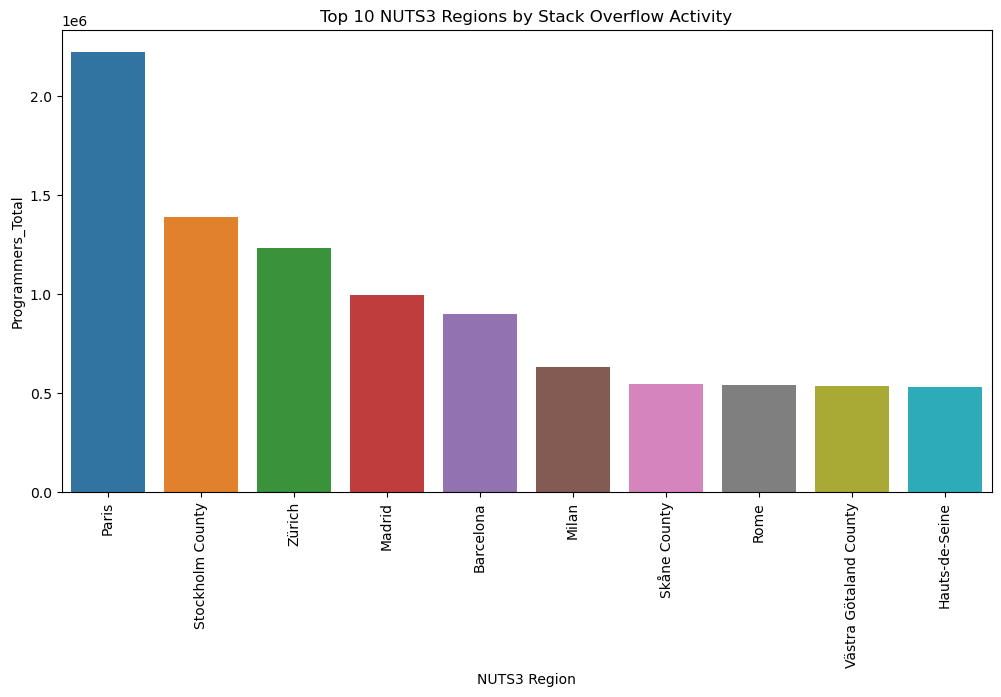

In [14]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title('Top {} NUTS3 Regions by Stack Overflow Activity'.format(10))
plt.xlabel('NUTS3 Region')
plt.ylabel('Programmers_Total')
plt.xticks(rotation=90)
plt.show()

In [16]:
FINAL_no_TR['Programming_Density'] = FINAL_no_TR['Programmers_Total'] / (FINAL_no_TR['POP (THS)'] * 1000)
top_regions_str = FINAL_no_TR.groupby('nuts3_name')['Programming_Density'].sum().sort_values(ascending=False).head(10)
top_regions_str

nuts3_name
Balearic Islands    2.108223
Paris               1.014454
Zürich              0.837474
Zug                 0.829159
La Palma            0.683873
Basel-Stadt         0.640741
Stockholm County    0.624063
Genève              0.597884
Vaud                0.491553
Skåne County        0.419612
Name: Programming_Density, dtype: float64

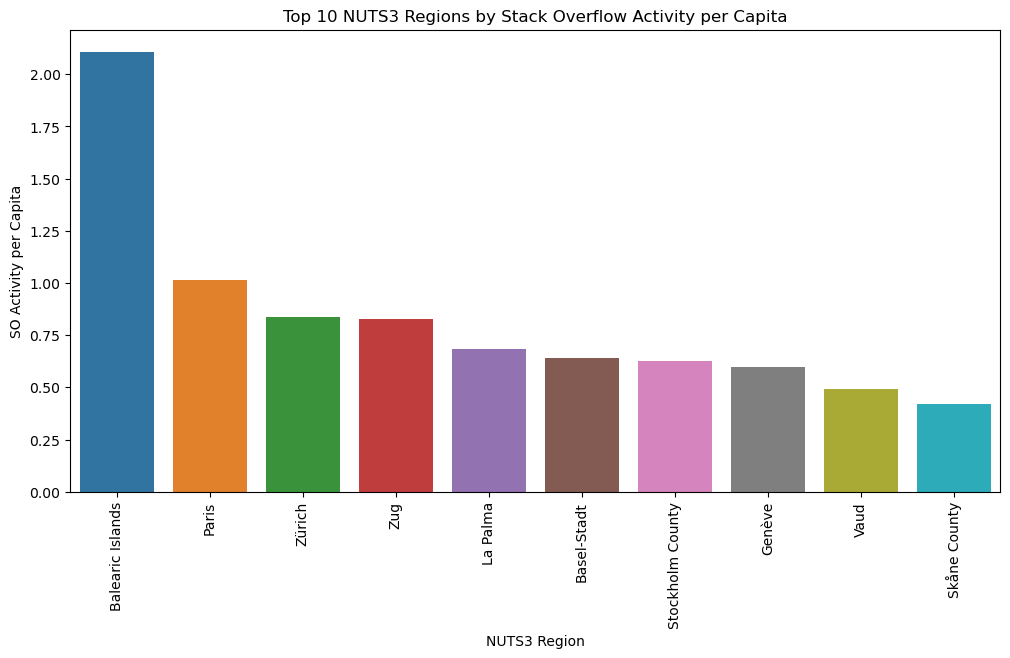

In [17]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions_str.index, y=top_regions_str.values)
plt.title('Top {} NUTS3 Regions by Stack Overflow Activity per Capita'.format(10))
plt.xlabel('NUTS3 Region')
plt.ylabel('SO Activity per Capita')
plt.xticks(rotation=90)
plt.show()

In [18]:
top_locations_per_year = FINAL_no_TR.groupby('year').apply(lambda x: x.nlargest(10, 'Programming_Density')).reset_index(drop=True)
top_locations_per_year

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density
0,2008,La Palma,ES,39,348,0,0,433,ES707,32.600,1584.750000,1460.500000,83.00,29.000000,6.500000,144.333333,179.833333,0.002167
1,2008,Blekinge County,SE,37,421,0,0,243,SE221,70.000,5043.440000,4465.950000,151.99,35.083333,6.166667,81.000000,122.250000,0.000804
2,2008,Basel-Stadt,CH,57,370,0,0,297,CH031,93.719,19111.357999,18409.572157,185.95,30.833333,9.500000,99.000000,139.333333,0.000749
3,2008,Stockholm County,SE,937,5033,0,0,2140,SE110,1124.000,104666.790000,92682.110000,1964.92,419.416667,156.166667,713.333333,1288.916667,0.000656
4,2008,Skåne County,SE,284,1414,0,0,1580,SE224,563.000,40961.320000,36271.110000,1206.95,117.833333,47.333333,526.666667,691.833333,0.000573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020,Zug,CH,1259,1130,15990,757,3972,CH066,70.383,18984.640419,18267.547912,128.22,94.166667,209.833333,6906.333333,7210.333333,0.056234
126,2020,Stockholm County,SE,32227,35318,197190,25345,141595,SE110,1298.000,153963.040000,136663.360000,2385.10,2943.166667,5371.166667,121376.666667,129691.000000,0.054375
127,2020,Basel-Stadt,CH,2551,2629,20490,682,7531,CH031,100.639,35228.958199,34045.157731,196.29,219.083333,425.166667,9567.666667,10211.916667,0.052025
128,2020,Vaud,CH,7047,7722,51000,5194,36217,CH011,415.954,52735.393712,51464.487387,809.93,643.500000,1174.500000,30803.666667,32621.666667,0.040277


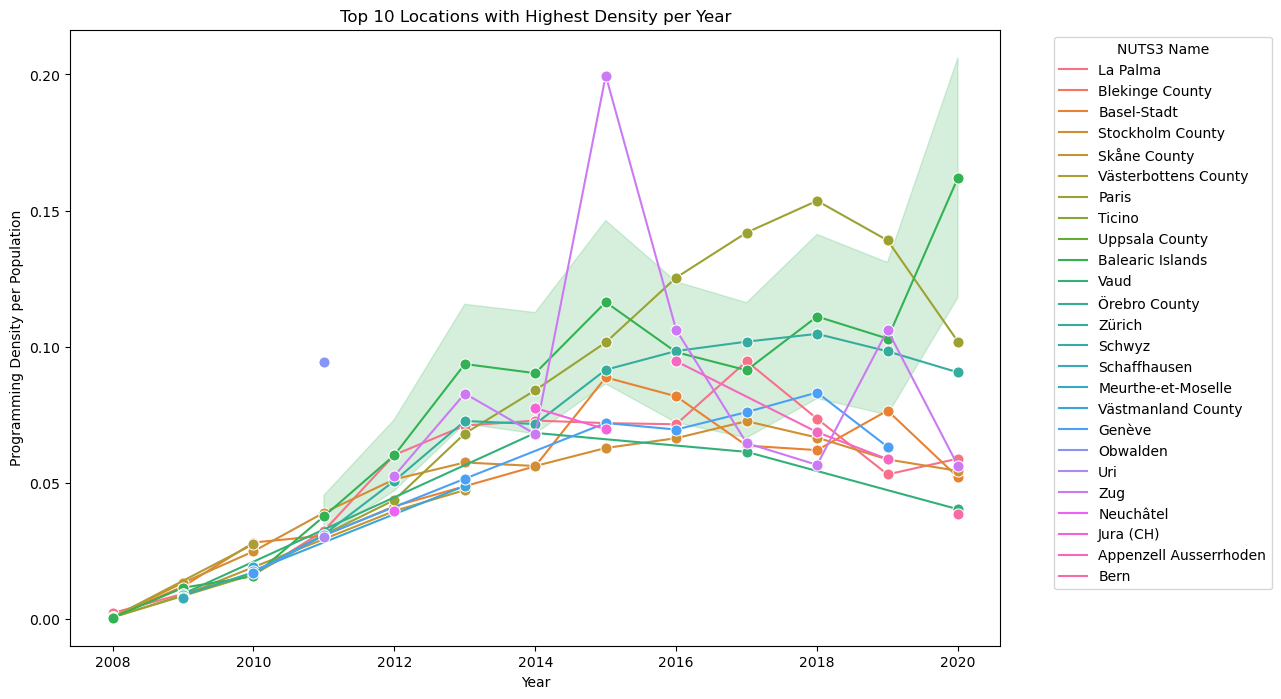

In [19]:
# Define a color palette with distinct colors for each location
palette = sns.color_palette("husl", n_colors=top_locations_per_year['nuts3_name'].nunique())

# Line plot for the top 10 locations with highest density per year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='Programming_Density', hue='nuts3_name', data=top_locations_per_year, marker='o', markersize=8)
plt.title('Top 10 Locations with Highest Density per Year')
plt.xlabel('Year')
plt.ylabel('Programming Density per Population')
plt.legend(title='NUTS3 Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
# Filter out top 10 regions based on mean programmer density per population
bottom_locations_per_year = FINAL_no_TR.groupby('nuts3_name').mean().nsmallest(10, 'Programming_Density').index
bottom_locations_per_year = FINAL_no_TR[FINAL_no_TR['nuts3_name'].isin(bottom_locations_per_year)]

bottom_locations_per_year = bottom_locations_per_year.sort_values(by='year')
bottom_locations_per_year

,year,nuts3_name,country,questioncount,answercount,upvotecount,downvotecount,commentcount,nuts3_code,EMP (THS),GDP (MIO_EUR),GVA (MIO_EUR),POP (THS),Experts,Innovators,Late_Adopters,Programmers_Total,Programming_Density
13,2008,Agrigento,IT,0,0,0,0,0,ITG14,127.90,6568.11,5924.70,449.80,0.000000,0.000000,0.000000,0.000000,0.000000
936,2008,Crotone,IT,0,0,0,0,0,ITF62,58.50,3147.76,2839.40,170.90,0.000000,0.000000,0.000000,0.000000,0.000000
1105,2008,Enna,IT,0,0,0,0,0,ITG16,52.50,2743.12,2474.40,175.30,0.000000,0.000000,0.000000,0.000000,0.000000
1248,2008,Frosinone,IT,7,23,0,0,8,ITI45,186.40,10570.27,9534.80,493.80,1.916667,1.166667,2.666667,5.750000,0.000012
2210,2008,Matera,IT,0,0,0,0,0,ITF52,75.50,4022.11,3628.10,201.40,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2020,Creuse,FR,58,34,192,4,79,FRI22,39.87,2351.47,2095.66,116.27,2.833333,9.666667,91.666667,104.166667,0.000896
675,2020,Caltanissetta,IT,66,54,354,21,154,ITG15,70.00,4039.24,3653.70,254.80,4.500000,11.000000,176.333333,191.833333,0.000753
25,2020,Agrigento,IT,123,86,334,0,184,ITG14,118.70,6278.02,5678.80,419.80,7.166667,20.500000,172.666667,200.333333,0.000477
3262,2020,Sud Sardegna,IT,172,96,256,9,387,ITG2H,95.30,5243.92,4743.40,341.20,8.000000,28.666667,217.333333,254.000000,0.000744


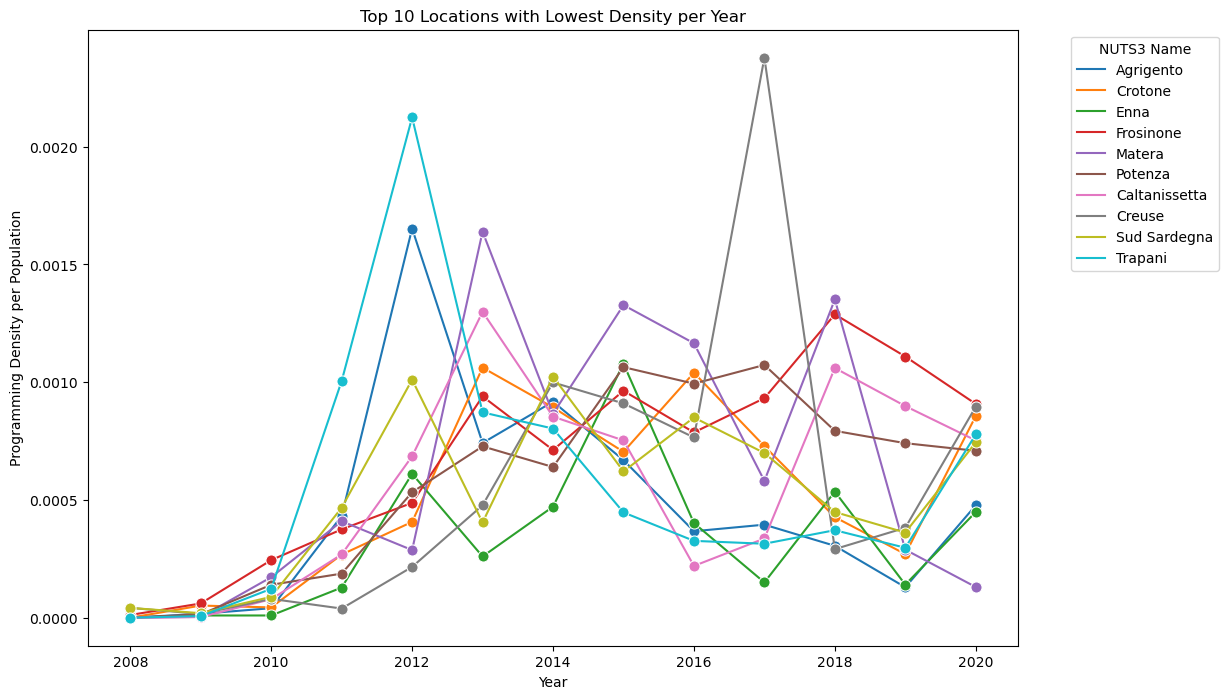

In [21]:
# Define a color palette with distinct colors for each location
palette = sns.color_palette("husl", n_colors=bottom_locations_per_year['nuts3_name'].nunique())

# Line plot for the top 10 locations with highest density per year
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='Programming_Density', hue='nuts3_name', data=bottom_locations_per_year, marker='o', markersize=8)
plt.title('Top 10 Locations with Lowest Density per Year')
plt.xlabel('Year')
plt.ylabel('Programming Density per Population')
plt.legend(title='NUTS3 Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**PLACEHOLDER**  Some conclusion based on the Programming Density per Population


In [23]:
# Calculate density per population and GDP
FINAL_no_TR['Programmer_Density_GDP'] = FINAL_no_TR['Programmers_Total'] / FINAL_no_TR['GDP (MIO_EUR)']

# Group by year and nuts 3 region, calculate mean density values
mean_density_by_gdp = FINAL_no_TR.groupby(['year', 'nuts3_name']).mean().reset_index()

# Rank the regions based on mean density
mean_density_by_gdp = mean_density_by_gdp[["year", "Programmer_Density_GDP", "nuts3_name"]].sort_values(by='Programmer_Density_GDP', ascending=False)

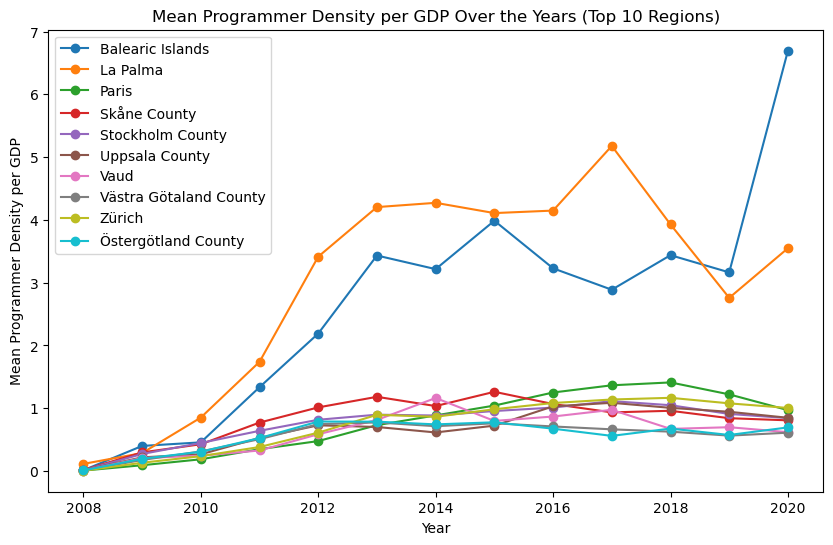

In [24]:
# Filter out top 10 regions based on mean programmer density per population
top_10_regions_gdp = mean_density_by_gdp.groupby('nuts3_name').mean().nlargest(10, 'Programmer_Density_GDP').index
filtered_data_gdp = mean_density_by_gdp[mean_density_by_gdp['nuts3_name'].isin(top_10_regions_gdp)]

filtered_data_gdp = filtered_data_gdp.sort_values(by='year')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for region, data in filtered_data_gdp.groupby('nuts3_name'):
    ax.plot(data['year'], data['Programmer_Density_GDP'], label=region, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Programmer Density per GDP')
ax.set_title('Mean Programmer Density per GDP Over the Years (Top 10 Regions)')
ax.legend()

plt.show()

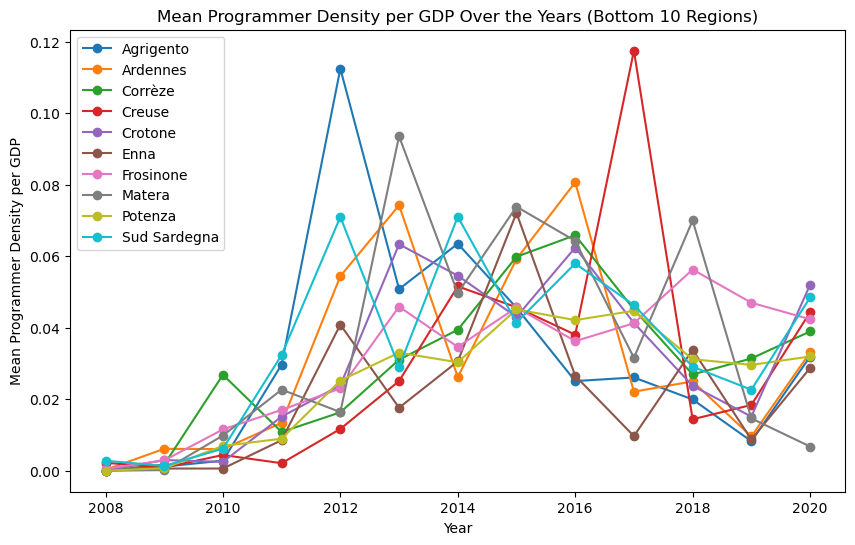

In [25]:
# Filter out top 10 regions based on mean programmer density per population
top_10_regions_gdp = mean_density_by_gdp.groupby('nuts3_name').mean().nsmallest(10, 'Programmer_Density_GDP').index
filtered_data_gdp = mean_density_by_gdp[mean_density_by_gdp['nuts3_name'].isin(top_10_regions_gdp)]

filtered_data_gdp = filtered_data_gdp.sort_values(by='year')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for region, data in filtered_data_gdp.groupby('nuts3_name'):
    ax.plot(data['year'], data['Programmer_Density_GDP'], label=region, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Programmer Density per GDP')
ax.set_title('Mean Programmer Density per GDP Over the Years (Bottom 10 Regions)')
ax.legend()

plt.show()

In [26]:
FINAL_no_TR["GDP_per_capita"] = FINAL_no_TR["GDP (MIO_EUR)"] / FINAL_no_TR["POP (THS)"]

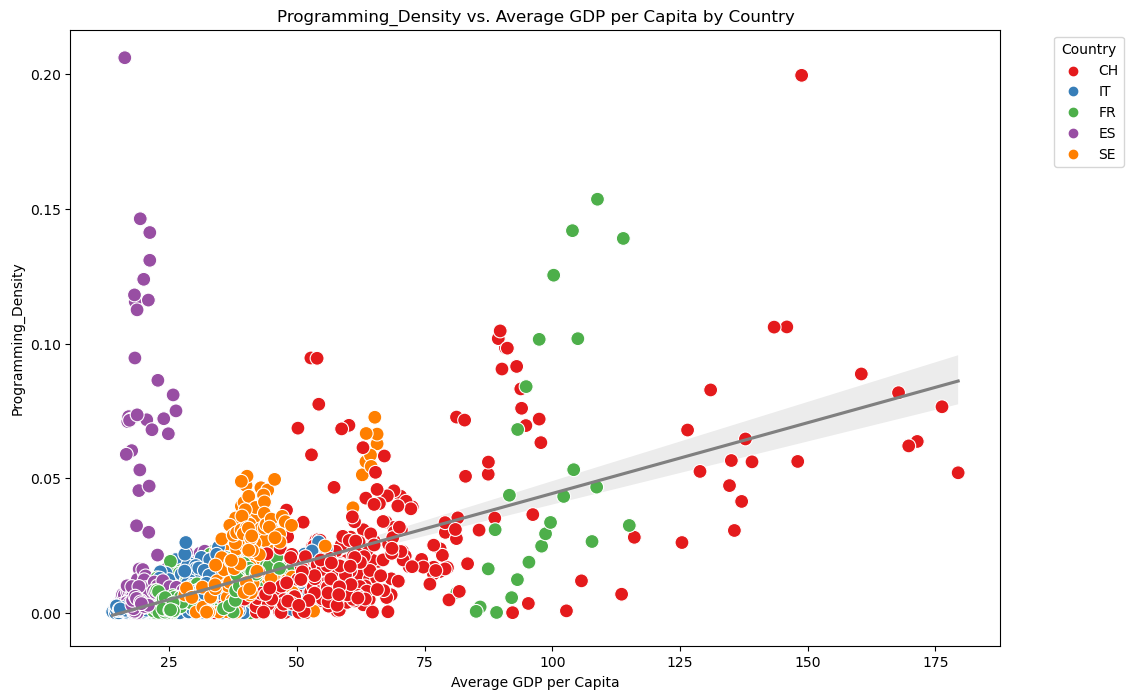

In [27]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Draw the regression line using regplot
sns.regplot(x='GDP_per_capita', y='Programming_Density', data=FINAL_no_TR, scatter=False, color='gray')

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='GDP_per_capita', y='Programming_Density', hue='country', data=FINAL_no_TR, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programming_Density vs. Average GDP per Capita by Country')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Programming_Density')

# Adding legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

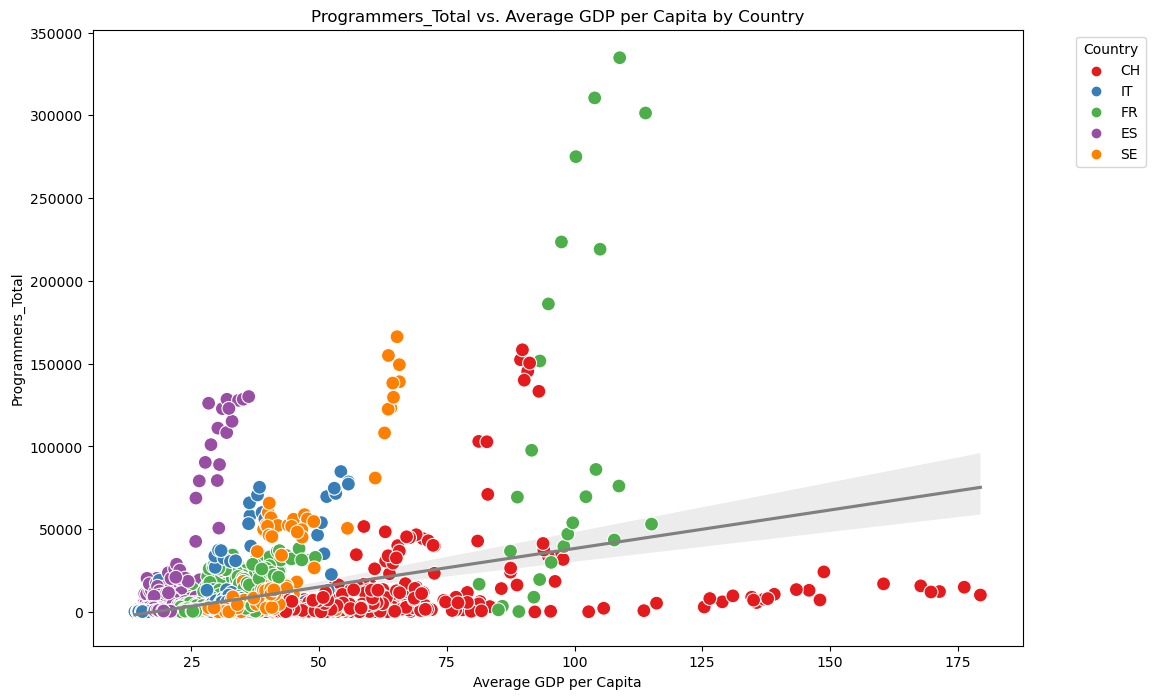

In [28]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Draw the regression line using regplot
sns.regplot(x='GDP_per_capita', y='Programmers_Total', data=FINAL_no_TR, scatter=False, color='gray')

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='GDP_per_capita', y='Programmers_Total', hue='country', data=FINAL_no_TR, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programmers_Total vs. Average GDP per Capita by Country')
plt.xlabel('Average GDP per Capita')
plt.ylabel('Programmers_Total')

# Adding legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

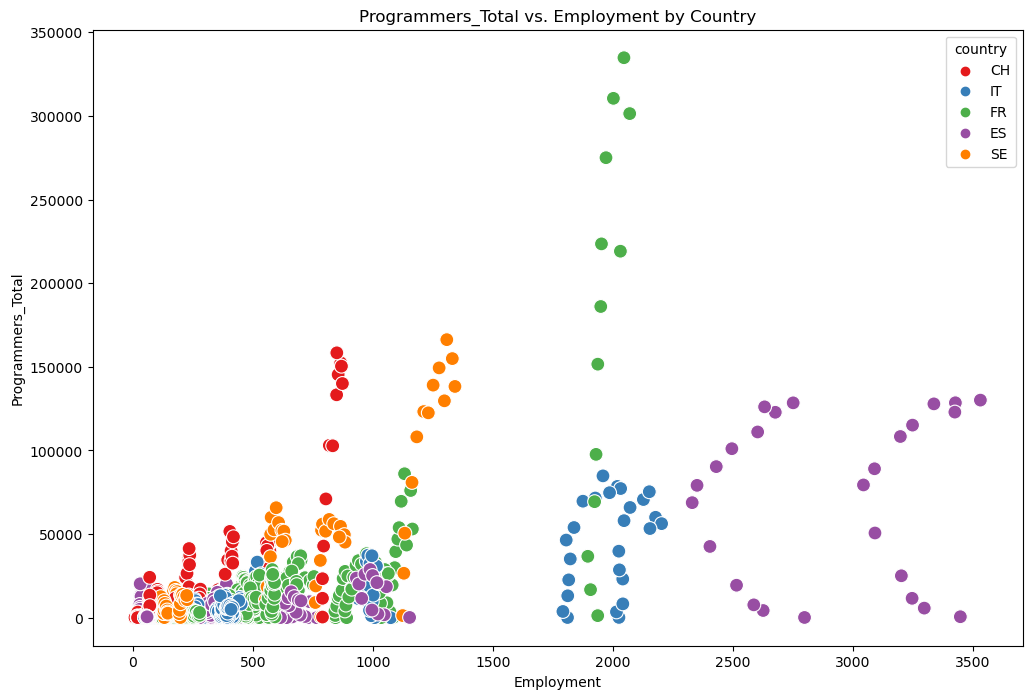

In [29]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='EMP (THS)', y='Programmers_Total', hue='country', data=FINAL_no_TR, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programmers_Total vs. Employment by Country')
plt.xlabel('Employment')
plt.ylabel('Programmers_Total')


# Display the plot
plt.show()

In [30]:
# Set thresholds for outliers
high_density_low_gdp_threshold = 0.95  # adjust as needed
low_density_high_gdp_threshold = 0.05  # adjust as needed

# Identify outliers
high_density_low_gdp_outliers = FINAL_no_TR[(FINAL_no_TR['Programming_Density'] > high_density_low_gdp_threshold) & (FINAL_no_TR['GDP_per_capita'] < FINAL_no_TR['GDP_per_capita'].quantile(0.25))]
low_density_high_gdp_outliers = FINAL_no_TR[(FINAL_no_TR['Programming_Density'] < low_density_high_gdp_threshold) & (FINAL_no_TR['GDP_per_capita'] > FINAL_no_TR['GDP_per_capita'].quantile(0.75))]

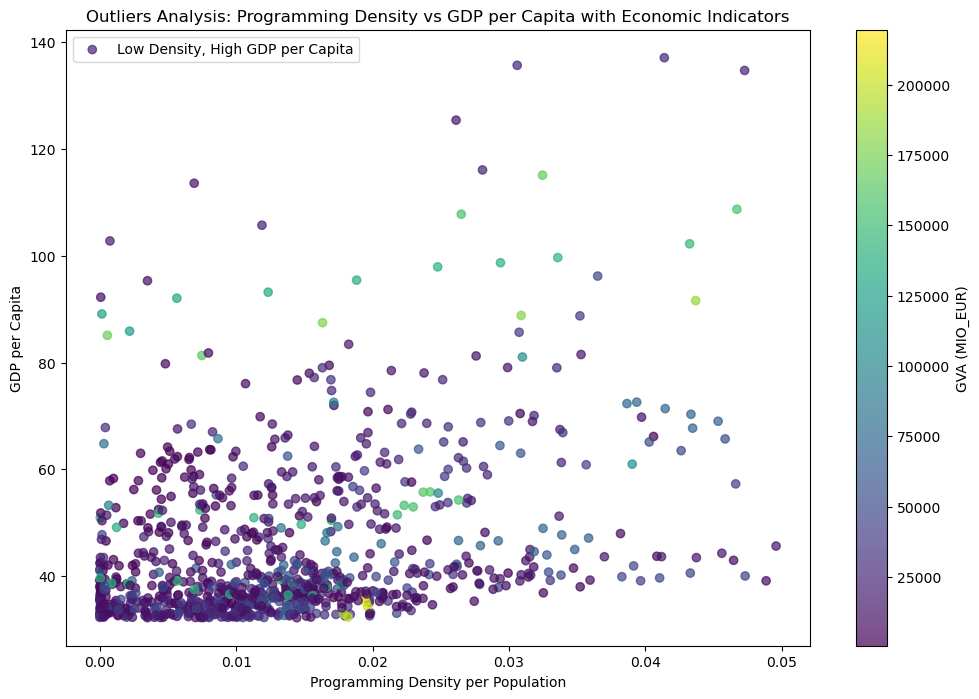

In [31]:
plt.figure(figsize=(12, 8))

# Scatter plot for low density and high GDP per capita outliers
plt.scatter(low_density_high_gdp_outliers['Programming_Density'], 
            low_density_high_gdp_outliers['GDP_per_capita'],
            c=low_density_high_gdp_outliers['GVA (MIO_EUR)'],  # Color represents GVA
            cmap='viridis',  # Choose a colormap for GVA
            alpha=0.7,  # Adjust transparency
            label='Low Density, High GDP per Capita')

# Set labels and title
plt.title('Outliers Analysis: Programming Density vs GDP per Capita with Economic Indicators')
plt.xlabel('Programming Density per Population')
plt.ylabel('GDP per Capita')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('GVA (MIO_EUR)')

# Add legend
plt.legend()

# Show the plot
plt.show()

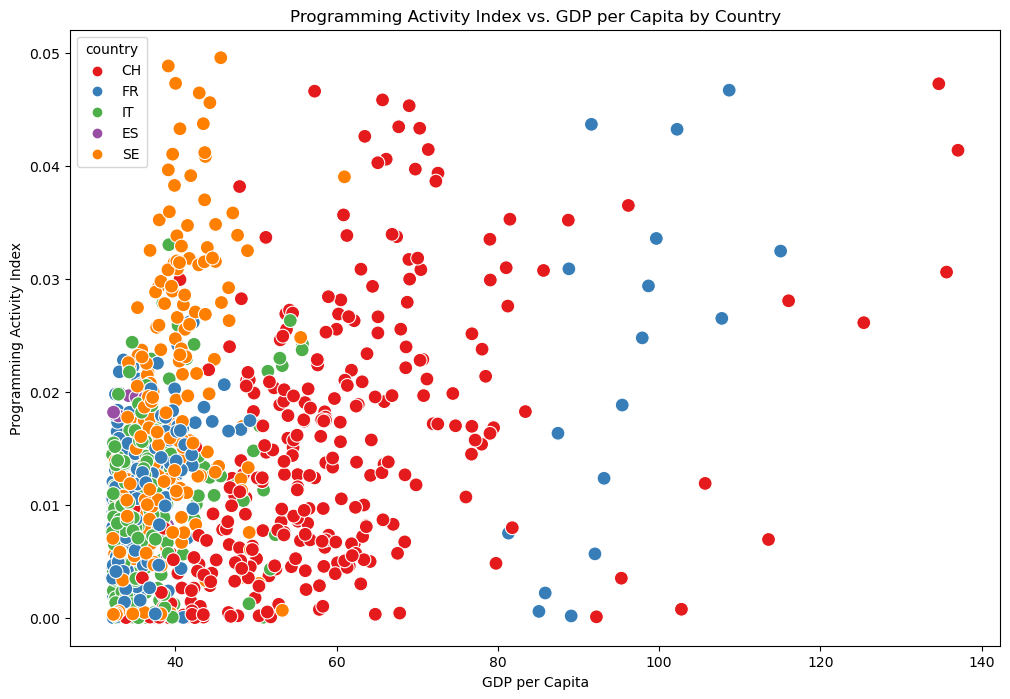

In [32]:
# Create the scatter plot with a regression line
plt.figure(figsize=(12, 8))

# Overlay the scatter plot with different colors for each NUTS 2 region
sns.scatterplot(x='GDP_per_capita', y='Programming_Density', hue='country', data=low_density_high_gdp_outliers, palette='Set1', s=100)

# Adding titles and labels
plt.title('Programming Activity Index vs. GDP per Capita by Country')
plt.xlabel('GDP per Capita')
plt.ylabel('Programming Activity Index')


# Display the plot
plt.show()

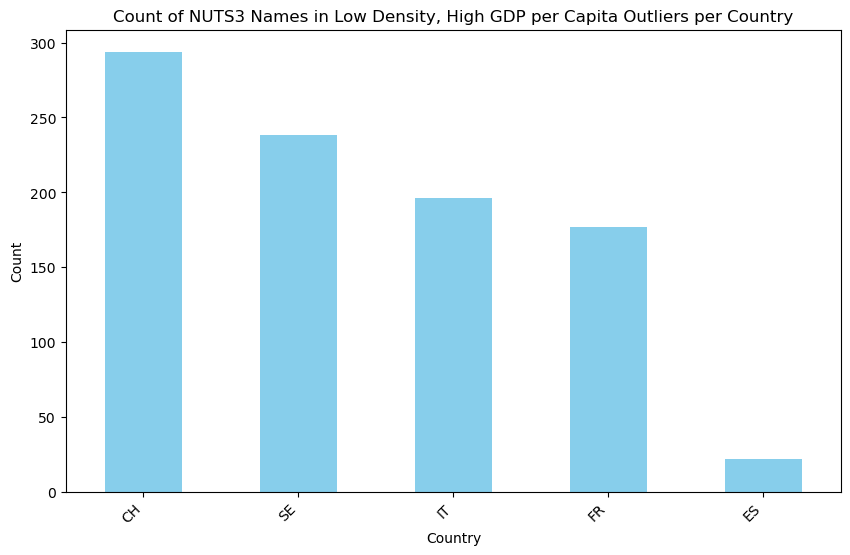

In [33]:
outliers_count_per_country = low_density_high_gdp_outliers['country'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
outliers_count_per_country.plot(kind='bar', color='skyblue')
plt.title('Count of NUTS3 Names in Low Density, High GDP per Capita Outliers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

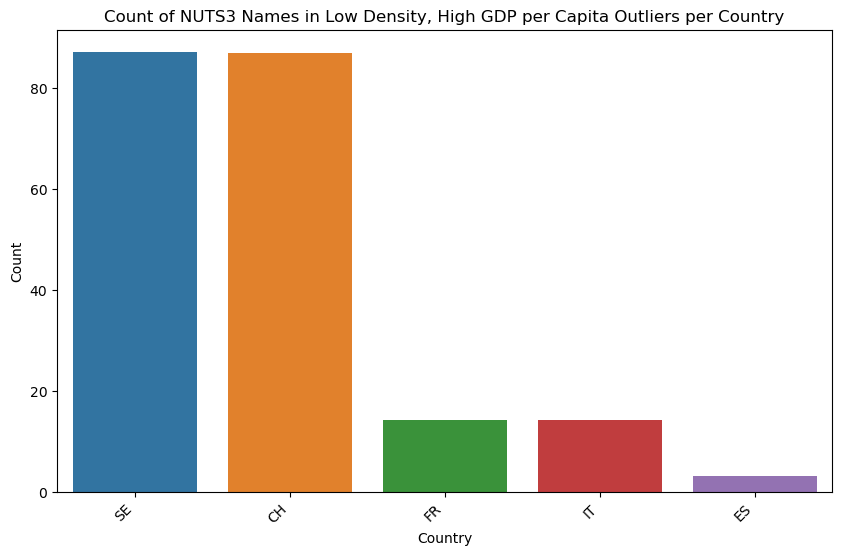

In [34]:
# Count total NUTS3 names per country in the entire DataFrame df
total_count_per_country = FINAL_no_TR['country'].value_counts()

# Create a DataFrame to compare counts
comparison_df = pd.DataFrame({
    'Outliers Count': outliers_count_per_country,
    'Total Count': total_count_per_country
})

comparison_df["Ratio"] = ((comparison_df['Outliers Count'] / comparison_df['Total Count']) * 100)

# Create a bar chart

comparison_df = comparison_df.sort_values(by = 'Ratio', ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x=comparison_df.index, y=comparison_df.Ratio)
plt.title('Count of NUTS3 Names in Low Density, High GDP per Capita Outliers per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


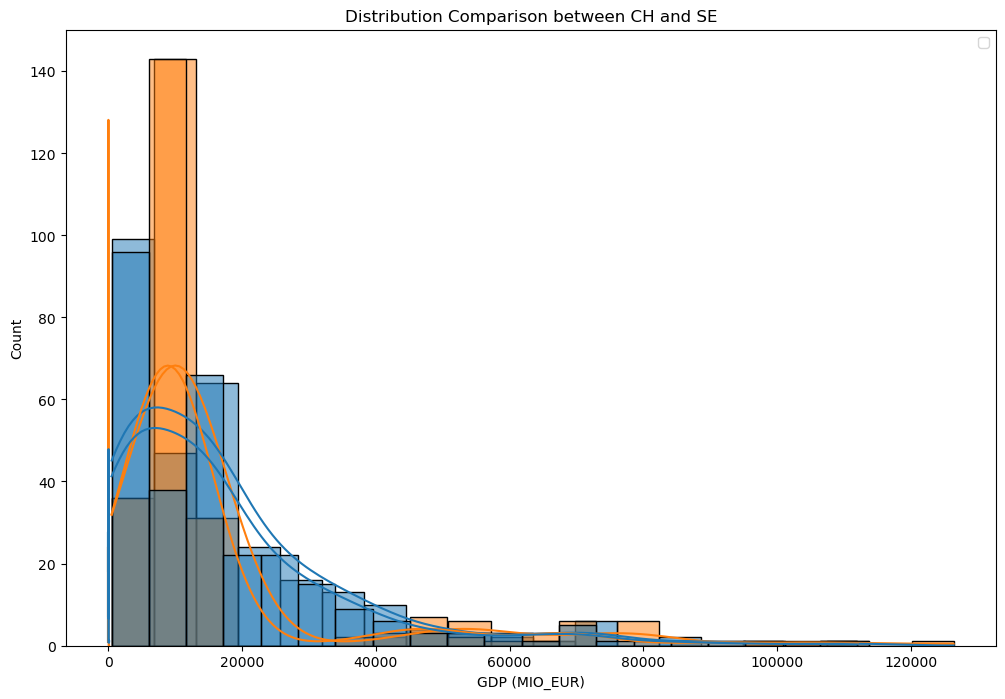

In [35]:
# Filter data for CH and SE
CH_SE = low_density_high_gdp_outliers[(low_density_high_gdp_outliers['country'] == "CH") | (low_density_high_gdp_outliers['country'] == "SE")]

# Descriptive Statistics
descriptive_stats = CH_SE[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita', 'country']].groupby('country').describe()

# Distribution Comparison
plt.figure(figsize=(12, 8))
for col in ['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']:
    sns.histplot(data=CH_SE, x=col, hue='country', kde=True, bins=20, alpha=0.5)
plt.legend()
plt.title('Distribution Comparison between CH and SE')
plt.show()

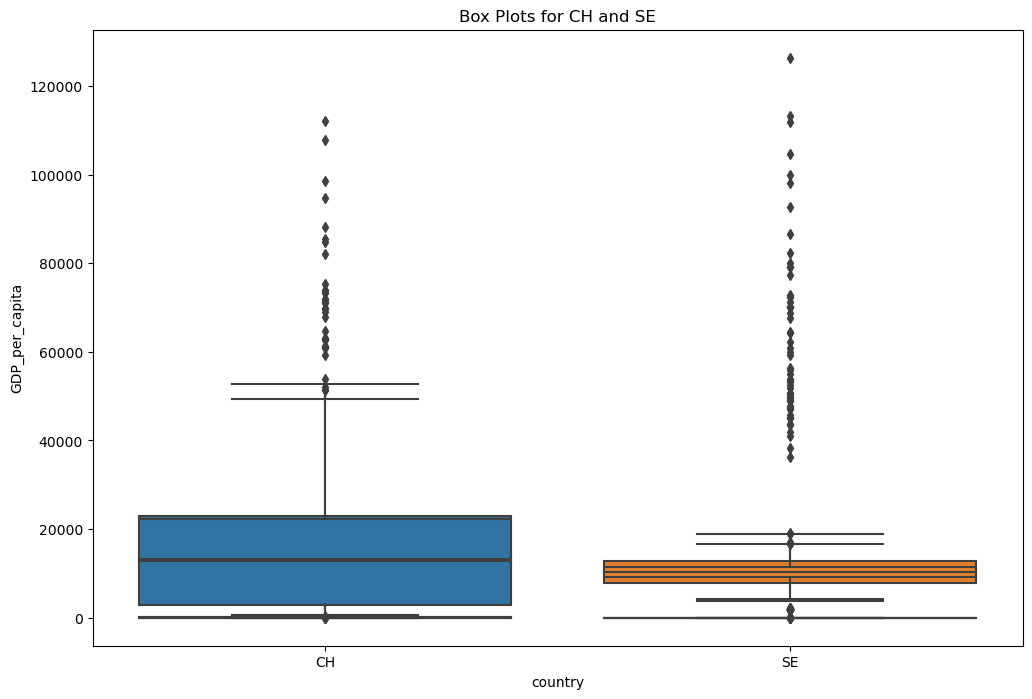

In [36]:
# Box Plots
plt.figure(figsize=(12, 8))
for col in ['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']:
    sns.boxplot(x='country', y=col, data=CH_SE)
plt.title('Box Plots for CH and SE')
plt.show()

In [37]:
descriptive_stats

GDP (MIO_EUR)                                                        \
                count          mean           std          min          25%   
country                                                                       
CH              294.0  17206.577282  18108.811248   526.542379  3064.642885   
SE              238.0  16973.496975  20633.401680  1959.450000  8789.402500   

                                                   GVA (MIO_EUR)  \
                  50%           75%            max         count   
country                                                            
CH       13225.192203  23069.468543  112051.185786         294.0   
SE       10430.615000  12805.097500  126394.950000         238.0   

                       ... Programming_Density           GDP_per_capita  \
                 mean  ...                 75%       max          count   
country                ...                                                
CH       16671.676345  ...            0.020943  0.047270          294.0   
SE       15046.462479  ...            0.023719  0.049576          238.0   

                                                                           \
              mean        std        min        25%        50%        75%   
country                                                                     
CH       58.684777  15.854154  33.885729  48.792292  56.521993  64.792322   
SE       38.883948   4.398964  32.249773  36.057731  37.947301  40.880164   

                     
                max  
country              
CH       137.082781  
SE        60.970527  

[2 rows x 32 columns]

In [38]:
without_outliers = FINAL_no_TR.drop(CH_SE.index)

descriptive_stats_1 = without_outliers[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita', 'country']].groupby('country').describe()
descriptive_stats_1

GDP (MIO_EUR)                                                        \
                count          mean           std         min           25%   
country                                                                       
CH               44.0  47306.323335  45286.525070  1065.53352  16620.244694   
ES              702.0  19977.137550  33935.266448  1369.74000   5876.590000   
FR             1248.0  22148.889784  29509.277516  1648.42000   6855.422500   
IT             1391.0  15555.208447  22977.078988  1605.51000   5812.175000   
SE               35.0  44473.931143  60802.352695  1477.17000   7017.805000   

                                                   GVA (MIO_EUR)  \
                  50%           75%            max         count   
country                                                            
CH       33806.389797  49789.795164  139562.093835          44.0   
ES       11725.175000  21041.555000  242093.290000         702.0   
FR       14067.070000  23214.875000  246936.500000        1248.0   
IT        9293.330000  16364.645000  181529.430000        1391.0   
SE        8274.230000  92301.080000  153963.040000          35.0   

                       ... Programming_Density           GDP_per_capita  \
                 mean  ...                 75%       max          count   
country                ...                                                
CH       45757.510536  ...            0.089177  0.199619           44.0   
ES       18265.500142  ...            0.007261  0.206158          702.0   
FR       19812.629030  ...            0.005811  0.153603         1248.0   
IT       13989.881452  ...            0.005301  0.033022         1391.0   
SE       39443.593143  ...            0.051012  0.072639           35.0   

                                                                             \
               mean        std        min        25%        50%         75%   
country                                                                       
CH       102.161856  41.766988  30.374388  66.687017  92.118573  138.147412   
ES        22.019748   4.668596  14.567821  18.460687  20.805772   25.326713   
FR        28.205526  11.299198  18.180449  23.372313  25.697130   29.697672   
IT        25.413648   6.986212  13.930197  19.166427  25.270399   29.827728   
SE        38.337936  15.756096  24.841673  28.350115  30.287018   51.517986   

                     
                max  
country              
CH       179.474034  
ES        39.030729  
FR       115.082174  
IT        55.773842  
SE        65.702936  

[5 rows x 32 columns]

In [39]:
# Correlation Analysis
correlation_matrix_outliers = CH_SE[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']].corr()
correlation_matrix_outliers

,GDP (MIO_EUR),GVA (MIO_EUR),Programming_Density,GDP_per_capita
GDP (MIO_EUR),1.000000,0.998248,0.428092,0.238146
GVA (MIO_EUR),0.998248,1.000000,0.429550,0.266404
Programming_Density,0.428092,0.429550,1.000000,0.240195
GDP_per_capita,0.238146,0.266404,0.240195,1.000000


In [40]:
correlation_matrix_df = without_outliers[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'Programming_Density', 'GDP_per_capita']].corr()
correlation_matrix_df

,GDP (MIO_EUR),GVA (MIO_EUR),Programming_Density,GDP_per_capita
GDP (MIO_EUR),1.000000,0.999746,0.365210,0.513427
GVA (MIO_EUR),0.999746,1.000000,0.368684,0.516147
Programming_Density,0.365210,0.368684,1.000000,0.603261
GDP_per_capita,0.513427,0.516147,0.603261,1.000000
